In [59]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn import svm
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [29]:
diabetes_dataset = pd.read_csv(r"D:\diabetes.csv")

In [81]:
diabetes_dataset.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148.0,72.0,35.0,125.0,33.6,0.627,50,1
1,1,85.0,66.0,29.0,125.0,26.6,0.351,31,0
2,8,183.0,64.0,29.0,125.0,23.3,0.672,32,1
3,1,89.0,66.0,23.0,94.0,28.1,0.167,21,0
4,0,137.0,40.0,35.0,168.0,43.1,2.288,33,1


In [73]:
diabetes_dataset.shape

(768, 9)

In [61]:
columns_with_zero_issues = ["Glucose", "BloodPressure", "SkinThickness", "Insulin", "BMI"]
diabetes_dataset[columns_with_zero_issues] = diabetes_dataset[columns_with_zero_issues].replace(0, np.nan)

In [85]:
diabetes_dataset.fillna(diabetes_dataset.median(), inplace=True)

In [87]:
diabetes_dataset.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,121.656250,72.386719,29.108073,140.671875,32.455208,0.471876,33.240885,0.348958
std,3.369578,30.438286,12.096642,8.791221,86.383060,6.875177,0.331329,11.760232,0.476951
min,0.000000,44.000000,24.000000,7.000000,14.000000,18.200000,0.078000,21.000000,0.000000
25%,1.000000,99.750000,64.000000,25.000000,121.500000,27.500000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,29.000000,125.000000,32.300000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [89]:
# Add BMI Category
bins_bmi = [0, 18.5, 24.9, 29.9, 100]
labels_bmi = ["Underweight", "Normal", "Overweight", "Obese"]
diabetes_dataset['BMI_Category'] = pd.cut(diabetes_dataset['BMI'], bins=bins_bmi, labels=labels_bmi)

In [91]:
# Age groups
bins_age = [20, 30, 40, 50, 100]
labels_age = ["Young", "Middle", "Old", "Senior"]
diabetes_dataset['AgeGroup'] = pd.cut(diabetes_dataset['Age'], bins=bins_age, labels=labels_age)

In [93]:
diabetes_dataset = pd.get_dummies(diabetes_dataset, columns=['BMI_Category', 'AgeGroup'], drop_first=True)

In [95]:
X = diabetes_dataset.drop(columns='Outcome', axis=1)
Y = diabetes_dataset['Outcome']

In [133]:
print(X)
print(Y)

     Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0              6    148.0           72.0           35.0    125.0  33.6   
1              1     85.0           66.0           29.0    125.0  26.6   
2              8    183.0           64.0           29.0    125.0  23.3   
3              1     89.0           66.0           23.0     94.0  28.1   
4              0    137.0           40.0           35.0    168.0  43.1   
..           ...      ...            ...            ...      ...   ...   
763           10    101.0           76.0           48.0    180.0  32.9   
764            2    122.0           70.0           27.0    125.0  36.8   
765            5    121.0           72.0           23.0    112.0  26.2   
766            1    126.0           60.0           29.0    125.0  30.1   
767            1     93.0           70.0           31.0    125.0  30.4   

     DiabetesPedigreeFunction  Age  BMI_Category_Normal  \
0                       0.627   50                Fa

In [99]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [101]:
X_train, X_test, Y_train, Y_test = train_test_split(X_scaled, Y, test_size=0.2, stratify=Y, random_state=2)

In [131]:
print(X.shape, X_train.shape, X_test.shape)

(768, 14) (614, 14) (154, 14)


In [103]:
classifier = svm.SVC(kernel='linear')
classifier.fit(X_train, Y_train)

SVC(kernel='linear')

In [105]:
# Evaluate performance
X_train_prediction = classifier.predict(X_train)
X_test_prediction = classifier.predict(X_test)

In [107]:
print('Training Accuracy:', accuracy_score(Y_train, X_train_prediction))
print('Test Accuracy:', accuracy_score(Y_test, X_test_prediction))
print("\nClassification Report:\n", classification_report(Y_test, X_test_prediction))

Training Accuracy: 0.7915309446254072
Test Accuracy: 0.7597402597402597

Classification Report:
               precision    recall  f1-score   support

           0       0.77      0.90      0.83       100
           1       0.73      0.50      0.59        54

    accuracy                           0.76       154
   macro avg       0.75      0.70      0.71       154
weighted avg       0.76      0.76      0.75       154



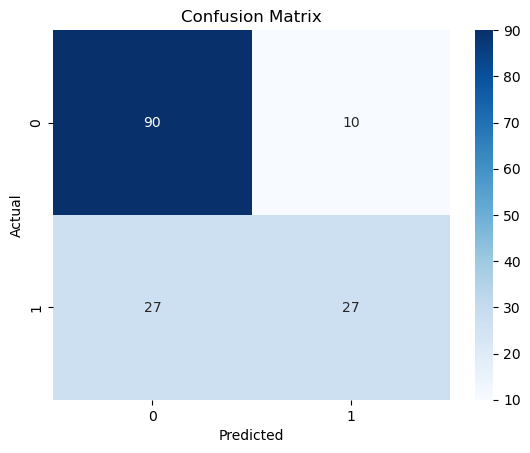

In [109]:
# Confusion Matrix
sns.heatmap(confusion_matrix(Y_test, X_test_prediction), annot=True, cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

In [191]:
def predict_diabetes(input_data, feature_names):

    input_df = pd.DataFrame([input_data], columns=feature_names)

    input_scaled = scaler.transform(input_df)

    # Make prediction
    prediction = classifier.predict(input_scaled)
    return 'The person is diabetic' if prediction[0] == 1 else 'The person is not diabetic'


In [143]:
missing_cols = [col for col in X.columns if col not in example_df.columns]
for col in missing_cols:
    example_df[col] = 0
example_df = example_df[X.columns]

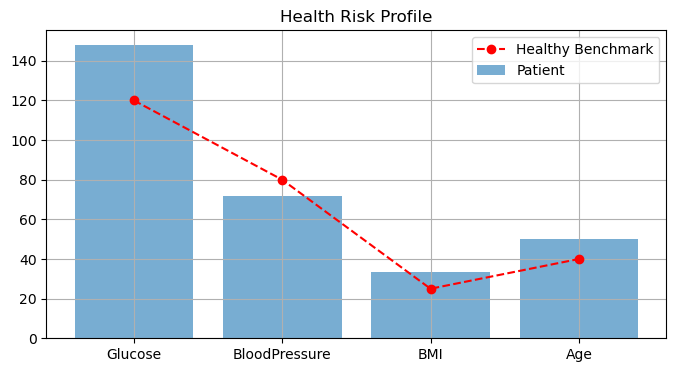

In [121]:
def plot_risk_profile(sample):
    features = ["Glucose", "BloodPressure", "BMI", "Age"]
    healthy_ranges = {"Glucose": 120, "BloodPressure": 80, "BMI": 25, "Age": 40}
    
    values = [sample[feat] for feat in features]
    healthy = [healthy_ranges[feat] for feat in features]

    plt.figure(figsize=(8, 4))
    plt.bar(features, values, alpha=0.6, label='Patient')
    plt.plot(features, healthy, 'ro--', label='Healthy Benchmark')
    plt.title("Health Risk Profile")
    plt.legend()
    plt.grid(True)
    plt.show()

plot_risk_profile(diabetes_dataset.iloc[0])


In [193]:
feature_names = X.columns.tolist()

# Example input 
example_input = [5,166,72,19,175,25.8,0.587,51,1,0,0,0,1,0] 
result = predict_diabetes(example_input, feature_names)
print("Prediction:", result)


Prediction: The person is diabetic
